# Loading Dataset from SKlearn

In [489]:
from sklearn import datasets
import numpy as np
import math
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
type(iris)
type(X)

numpy.ndarray

In [490]:
print(X.shape)
print(y.shape)
print(y)

(150, 2)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


# Splitting  and Concatenate the dataset

In [491]:
def split(data):
  ## Shuffling the dataset
  np.random.shuffle(data)

  train_set, valid_set, test_set = [], [], []

  ## Splitting the date
  for d in data:
    r = np.random.uniform(0, 1)
    if 0 <= r <= 0.7:
      train_set.append(d)
    elif 0.7 < r <= 0.85:
      valid_set.append(d)
    else:
      test_set.append(d)
  
  return np.array(train_set), np.array(valid_set), np.array(test_set) 


In [492]:
data = np.column_stack((X,y))
data_set = []
for d in data:
  data_set.append(np.concatenate(([1], d)))
data = np.array(data_set)
train_set_temp , valid_set, test_set = split(data)
print(train_set_temp.shape)
print(valid_set.shape)
print(test_set.shape)

(102, 4)
(26, 4)
(22, 4)


#Graph Plot

In [493]:
import matplotlib.pyplot as plt
def drawGraph(y, lr):
  plt.plot(range(1000), y, color='r')
  plt.ylabel('Train Loss')
  plt.xlabel('Epoch')
  plt.suptitle("Loss graph for Learning Rate=" + str(lr), fontsize=14)
  plt.show()

In [494]:
theta = np.random.uniform(0, 1, 3)
print(theta, type(theta))

[0.90869215 0.17918689 0.38463815] <class 'numpy.ndarray'>


# Logistic Regression Function

In [495]:
def logistic_regression(val_test_data, lr, theta):

  #### TRAIN ####

  train_loss = []
  for i in range (1000):
    tj = 0
    for k, x in enumerate(train_set):
      z = np.dot(x[:3], theta)
      h = 1/(1 + np.exp(-z))
      j = -x[3]*math.log(h) - (1-x[3])*math.log(1-h)
      tj = tj + j
      dv = x[:3]*(h-x[3])
      theta = theta - (dv*lr)
      #print(theta)
    tj = tj/ train_set.shape[0]
    #print(tj)
    train_loss.append(tj)

  drawGraph(train_loss, lr) ## Drawing graph

  #### TEST ####

  correct = 0
  for x in val_test_data:
    z = np.dot(x[:3], theta)
    h = 1/(1 + np.exp(-z))
    if h >= 0.5:
      h = 1
    else:
      h = 0
    if h == x[3]:
      correct+=1
  val_acc = (correct / val_test_data.shape[0]) * 100
  return val_acc

# Simulating Logistic Regression Model

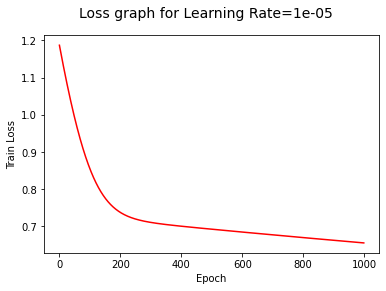

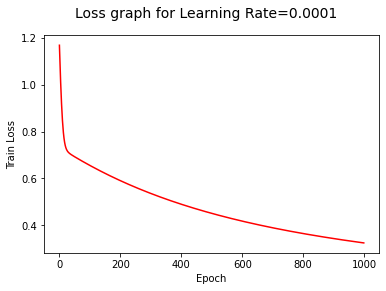

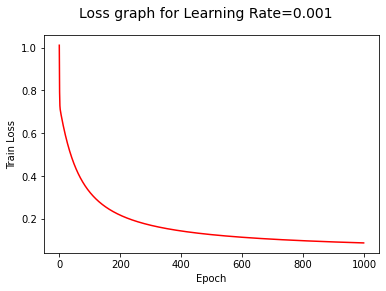

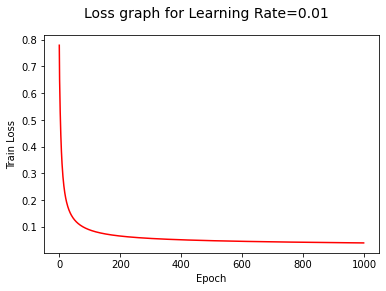

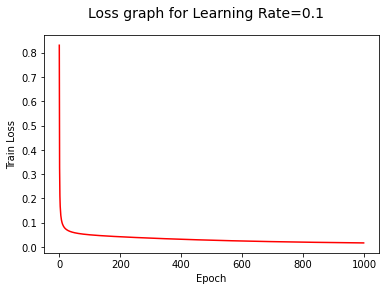



'Learning Rate' VS 'Validation Accuracy Table'

+-----------------+-----------------------+
|   Learning Rate |   Validation Accuracy |
+=================+=======================+
|          1e-05  |               65.3846 |
+-----------------+-----------------------+
|          0.0001 |               96.1538 |
+-----------------+-----------------------+
|          0.001  |              100      |
+-----------------+-----------------------+
|          0.01   |              100      |
+-----------------+-----------------------+
|          0.1    |              100      |
+-----------------+-----------------------+

		----FOR TEST DATA----


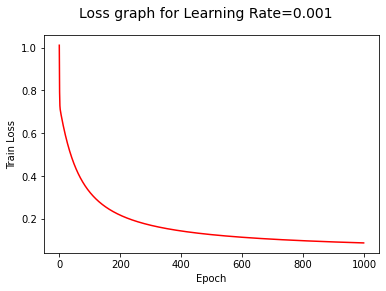

>>> Best Learning Rate = 0.001
>>> Test Accuracy= 95.45454545454545


In [496]:
from tabulate import tabulate
lrs = [.00001, .0001, .001, .01, .1]
accuracy = []
for lr in lrs:
  acc = logistic_regression(valid_set, lr, theta)
  accuracy.append([lr, acc])
table = tabulate(accuracy, ["Learning Rate", "Validation Accuracy"], tablefmt='grid')
print("\n\n'Learning Rate' VS 'Validation Accuracy Table'\n")
print(table)

## selecting best lr and simulate with test set
print("\n\t\t----FOR TEST DATA----")
def sortkey(e):
  return e[1]
accuracy.sort(key=sortkey, reverse=True)
best_lr = accuracy[0][0]
test_accuracy = logistic_regression(test_set, best_lr, theta)
print(">>> Best Learning Rate =", best_lr)
print(">>> Test Accuracy=", test_accuracy)